# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Load train and Test data file
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# Assign X and y from data files
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
# Number of training examples
n_train = y_train.shape[0]

# Number of testing examples.
n_test = y_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.=
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(32, 32, 3)
8


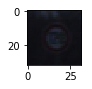

In [3]:
### Data exploration visualization 

import random
import matplotlib.pyplot as plt

%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
print (X_train[index].shape)

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf
import cv2

X_train, y_train = shuffle(X_train, y_train)
#Make Look-up table for (0.5,1.5)
def LTable(gamma) :   
    invGamma = 1.0 / gamma
    l_table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return l_table
#Generate dark/Brighten images and add them as another train data
gam_05 = LTable(0.5)[X_train]
gam_15 = LTable(1.5)[X_train]
X_train = np.vstack((gam_05,X_train,gam_15))
y_train = np.hstack((y_train,y_train,y_train))

#Adding more data
gr_X_train = np.dot(X_train, [0.299, 0.587, 0.114])
r_X_train = X_train[...,0]
g_X_train = X_train[...,1]
b_X_train = X_train[...,2]
X_train = np.vstack((gr_X_train,r_X_train,g_X_train,b_X_train))
y_train = np.hstack((y_train,y_train,y_train,y_train))
X_train = np.expand_dims((X_train),axis=3)

ImportError: No module named 'tensorflow'

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Idea : 
- More data can get good result with LeNet(with another CNN too)
- but It requires to consider overfitting due to images are derived from original image
- It is a supervised learning and all shapes of traffic signs are regulated by Government.
   Therefore handling Gamma and decompositing RGB image to separate R,G,B images bring me less worry about overfitting.

Please find the relation table between prepared data and it's accuracy with LeNet
- Original : 0.968 
- Grayscale : 0.975 
- GrayScale + Normalization : 0.955 
- GrayScale + R image + G Image + B Imgae : 0.989 
- Original+Gamma corrected(0.5,1.5) -> Grayscale + R image + G Image + B Image : 0.993


In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

EPOCHS = 60
BATCH_SIZE = 768

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
We usually divide our dataset into training and test(validation)set from 60:40 to 80:20 from experiences.
From the rule of thumb with considering added generated data, I choose 60:40(With considering overfitting) and I tried with 80:20,70:30 and 60:40 and they brought similar accuracy with LeNet


In [6]:

### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(9, 9, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(256, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

def VGGNet(x):  
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #Layer 1 : Input:[32x32x1] output:[32x32x32]  32 filters
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    #Layer 2 : Input:[32x32x32] output:[32x32x32]  32 filters
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
     # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)   
     # SOLUTION: Pooling. Input = 32x32x32. Output = 16x16x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


    #Layer 3 : Input:[16x16x32] output:[16x16x64]  64 filters
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    #Layer 4 : Input:[16x16x64] output:[16x16x64]  64 filters
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='SAME') + conv4_b
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4)

    # SOLUTION: Pooling. Input = 16x16x64. Output = 8x8x64.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    
    #Layer 5 : Input:[8x8x64] output:[8x8x128]  128 filters
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='SAME') + conv5_b
    # SOLUTION: Activation.
    conv5 = tf.nn.relu(conv5)
    
    #Layer 6 : Input:[8x8x128] output:[8x8x128]  128 filters
    conv6_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 128), mean = mu, stddev = sigma))
    conv6_b = tf.Variable(tf.zeros(128))
    conv6   = tf.nn.conv2d(conv5, conv6_W, strides=[1, 1, 1, 1], padding='SAME') + conv6_b
    # SOLUTION: Activation.
    conv6 = tf.nn.relu(conv6)
    
    #Layer 7 : Input:[8x8x128] output:[8x8x128]  128 filters
    conv7_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 128), mean = mu, stddev = sigma))
    conv7_b = tf.Variable(tf.zeros(128))
    conv7   = tf.nn.conv2d(conv6, conv7_W, strides=[1, 1, 1, 1], padding='SAME') + conv7_b
    # SOLUTION: Activation.
    conv7 = tf.nn.relu(conv7)  
    # SOLUTION: Pooling. Input = 8x8x64. Output = 4x4x128.
    conv7 = tf.nn.max_pool(conv7, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')    
    
    # SOLUTION: Flatten. Input = 4x4x128. Output = 2048.
    fc0   = flatten(conv7)
    
    # SOLUTION: Layer 8: Fully Connected. Input = 2048. Output = 2048.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 2048), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(2048))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1    = tf.nn.dropout(fc1,keep_prob)
    # SOLUTION: Layer 9: Fully Connected. Input = 2048. Output = 2048.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(2048, 2048), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(2048))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    fc2    = tf.nn.dropout(fc2,keep_prob)
        
    # SOLUTION: Layer 10: Fully Connected. Input = 2048. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(2048, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
My model is based on VGGNet. But We are treating small sized image. So, I made a kind of short version. kernel size is 3x3 and 7 convolution layers and 3 Fully Connected layers used. 
Layers are connected like following : 
- Conv -> reLU -> Conv -> reLU -> Resampling(Max-Pooling) -> Conv -> reLU -> Conv -> reLU -> Resampling(Max-Pooling) -> Conv -> reLU -> Conv -> reLU -> Resampling(Max-Pooling) -> FC(Fully Connected) -> Dropout -> FC -> Dropout -> FC

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
## Feature and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

##Training Pipeline
rate = 0.001

#logits = LeNet(x)
logits = VGGNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, k_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: k_data})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation, 1.0)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    ## Test Model
    test_accuracy = evaluate(np.expand_dims(np.dot(X_test, [0.299, 0.587, 0.114]), axis=3),y_test,1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    saver.save(sess, 'vggnet_100')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.063

EPOCH 2 ...
Validation Accuracy = 0.063

EPOCH 3 ...
Validation Accuracy = 0.073

EPOCH 4 ...
Validation Accuracy = 0.106

EPOCH 5 ...
Validation Accuracy = 0.190

EPOCH 6 ...
Validation Accuracy = 0.334

EPOCH 7 ...
Validation Accuracy = 0.482

EPOCH 8 ...
Validation Accuracy = 0.640

EPOCH 9 ...
Validation Accuracy = 0.747

EPOCH 10 ...
Validation Accuracy = 0.846

EPOCH 11 ...
Validation Accuracy = 0.894

EPOCH 12 ...
Validation Accuracy = 0.916

EPOCH 13 ...
Validation Accuracy = 0.938

EPOCH 14 ...
Validation Accuracy = 0.948

EPOCH 15 ...
Validation Accuracy = 0.955

EPOCH 16 ...
Validation Accuracy = 0.965

EPOCH 17 ...
Validation Accuracy = 0.972

EPOCH 18 ...
Validation Accuracy = 0.974

EPOCH 19 ...
Validation Accuracy = 0.977

EPOCH 20 ...
Validation Accuracy = 0.983

EPOCH 21 ...
Validation Accuracy = 0.983

EPOCH 22 ...
Validation Accuracy = 0.986

EPOCH 23 ...
Validation Accuracy = 0.986

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

 With small batch size with 100+ epochs went to sudden low accuracies. So, I set 768, relatively high number for batch size.
Epochs is set as 100. I tested several numbers for epoch. 100 Epochs show me significant result(with many times). and for hyperparameters, I just use same value for LeNet which is given for initial model. Usually, Small Gaussian random weight works well for most of cases. So, I keep mu=0, sigma=0.1 for hyperparameters 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I established several strategies before starting Project 2.
- Enough Preprocessing & enough size of data with adding more data using image processing to mimic various real environments(differemt sun lights..)
- Go Deep and enough epochs
- Use simple but verified model. and better performace than LeNet

For preprocessing, First I tried following approaches to have better accuracy with LeNet
- Original : 0.968 
- Grayscale : 0.975 
- GrayScale + Normalization : 0.955 
- GrayScale + R image + G Image + B Imgae : 0.989 
- Original+Gamma corrected(0.5,1.5) -> Grayscale + R image + G Image + B Image : 0.993
So, I choose Original+Gamma corrected(0.5,1.5) -> Grayscale + R image + G Image + B Image

For model, I decided to search some simple and well-known model for my CNN than adding more hidden layes on Base LeNet. and I found VGGNet and GoogLeNet for my project. GoogLeNet is using inception module and relatively more complex than VGGNet and more cost for development too. So, I choose VGGNet for my project.

I ran VGGNet model with and without dropout to know the effectiveness of dropout. Without dropout, shows me more good result. But, I use VGGNet with dropout. I think even if without-dropout gives me more good accuracy with test data, With-dropout will give me good result with real data. Because it is more generalized.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(5, 32, 32, 3)
(32, 32, 3)


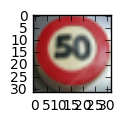

In [8]:
### Load the images and plot them here.
import random
import matplotlib.pyplot as plt
import matplotlib.image as img

X_img = []
X_img.append(img.imread('/home/jerome/DS_Works/CarND-Traffic-Sign-Classifier-Project/images/2_Cake.png')[...,:3])
X_img.append(img.imread('/home/jerome/DS_Works/CarND-Traffic-Sign-Classifier-Project/images/3_Speed60.png')[...,:3])
X_img.append(img.imread('/home/jerome/DS_Works/CarND-Traffic-Sign-Classifier-Project/images/15_NoVehicle.png')[...,:3])
X_img.append(img.imread('/home/jerome/DS_Works/CarND-Traffic-Sign-Classifier-Project/images/7_Speed100.png')[...,:3])
X_img.append(img.imread('/home/jerome/DS_Works/CarND-Traffic-Sign-Classifier-Project/images/5_Speed80.png')[...,:3])

X_img = np.array(X_img)
print (X_img.shape)

%matplotlib inline

# Cake shapes like 50km/h Speed limit
image = X_img[0].squeeze()
print (X_img[0].shape)

plt.figure(figsize=(1,1))
plt.imshow(image)

(32, 32, 3)


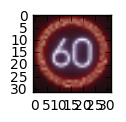

In [9]:
# Light type of 60km/h Speed limit
image = X_img[1].squeeze()
print (X_img[1].shape)

plt.figure(figsize=(1,1))
plt.imshow(image)

(32, 32, 3)


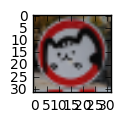

In [10]:
# No Vehicle Sign with Scribbling
image = X_img[2].squeeze()
print (X_img[2].shape)

plt.figure(figsize=(1,1))
plt.imshow(image)

(32, 32, 3)


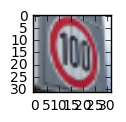

In [11]:
# different type of 100km/h Speed limit
image = X_img[3].squeeze()
print (X_img[3].shape)

plt.figure(figsize=(1,1))
plt.imshow(image)

(32, 32, 3)


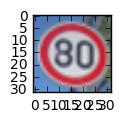

In [12]:
# Square type of Ahead Only
image = X_img[4].squeeze()
print (X_img[4].shape)

plt.figure(figsize=(1,1))
plt.imshow(image)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

"No Vehicle Sign with Scribbling" will be difficult for classification. It has a big scribbing on No Vehicle Sign.


In [13]:
### Run the predictions here.
sess = tf.Session()
new_saver = tf.train.import_meta_graph('vggnet_100.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))


In [14]:
predictions = sess.run(tf.argmax(tf.nn.softmax(logits),1), feed_dict={x:np.expand_dims(np.dot(X_img, [0.299, 0.587, 0.114]), axis=3), keep_prob: 1.0})
print (predictions)

[17  3  9  9  9]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

It's 20% accurate. 1 of them are matched correctly. I collected some difficult images. It looks I should find another way to improve. More data or more deep neural network. and a way to prevent wrong decision from scribbling on sign. I will improve through SDCND course.

In [18]:
### Visualize the softmax probabilities here.
softmax_prob = sess.run(tf.nn.softmax(logits), feed_dict={x:np.expand_dims(np.dot(X_img, [0.299, 0.587, 0.114]), axis=3), keep_prob: 1.0})
print (softmax_prob)
print (sess.run(tf.nn.top_k(tf.constant(softmax_prob), k=5)))

[[  1.13325641e-05   1.39820040e-03   1.27343843e-02   5.18362336e-02
    2.70352103e-02   8.42470467e-01   4.12305496e-07   3.94229479e-02
    2.12529339e-02   1.66840793e-04   3.27097182e-03   2.02929840e-07
    1.43000425e-05   3.16831538e-05   1.60157981e-06   3.32699092e-05
    2.43120176e-05   4.83553322e-07   5.97008193e-06   3.58183888e-06
    1.67044425e-06   2.63304600e-09   5.69860461e-08   3.54097693e-08
    5.40621592e-09   4.04474631e-05   2.31167978e-05   2.24974217e-09
    2.30008411e-07   1.57225186e-05   6.58172780e-07   5.97428016e-06
    7.31211314e-09   5.61594934e-05   3.94460017e-07   5.64731181e-06
    2.31551542e-08   9.62206954e-08   7.45846182e-06   2.86717859e-05
    9.82756756e-05   5.14423004e-10   4.40758596e-10]
 [  3.25450811e-15   9.39406419e-09   1.22029269e-06   9.99968410e-01
    5.10946450e-08   2.73283313e-05   1.08024058e-11   1.60031585e-10
    6.44406889e-11   2.10007883e-07   1.25318345e-09   3.42393214e-12
    1.81850077e-10   8.13633871e-09 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

No correct predictions. But, with Several trials, No.5 image has correct prediction on 1st~3rd large probabilities. and it is most normal image of which I used for project. No.1 and No.4 images have correct predicton on 4th or 5th. That images have different thickness of red circle and number(Because it is a cake!) or a bit shewed image due to position of camera. No. 2 and No. 3 aren't shown in top 5. They are most difficult images. LED traffic sign and traffic sign with scribbling. But Human can recognize them pretty well. So, It will be a point to be improved.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.